Pattern: ('br',), Count: 146
Pattern: ('store',), Count: 108
Pattern: ('call',), Count: 86
Pattern: ('load <- call',), Count: 64
Pattern: ('icmp <- br',), Count: 48
Pattern: ('store', 'br'), Count: 48
Pattern: ('icmp <- br', 'br'), Count: 48
Pattern: ('load <- icmp',), Count: 46
Pattern: ('load <- icmp', 'icmp <- br'), Count: 44
Pattern: ('load <- icmp', 'icmp <- br', 'br'), Count: 44


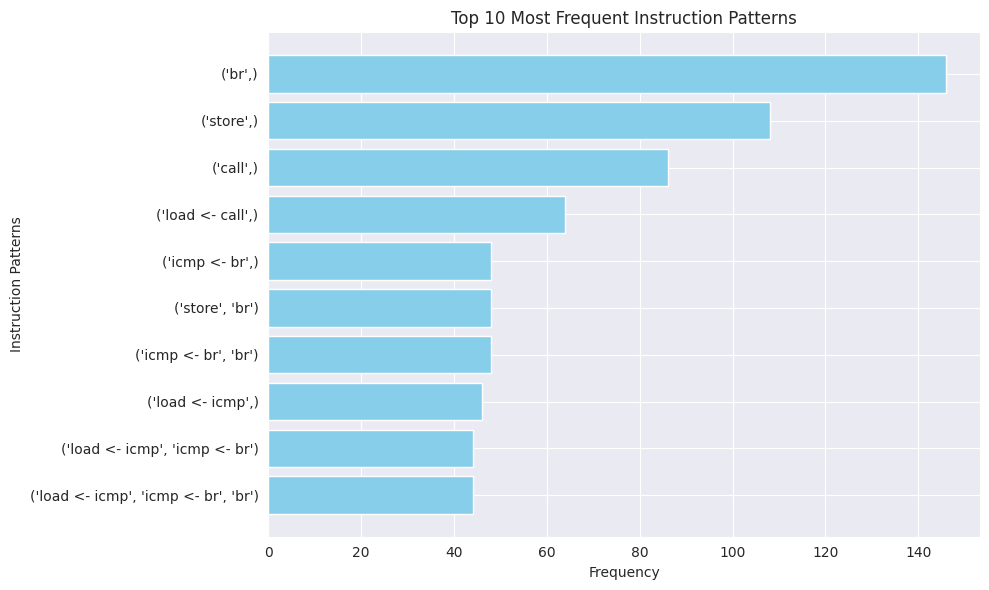

In [1]:
from collections import Counter
import matplotlib.pyplot as plt

with open("IR_traice.txt", "r") as f:
    trace = [line.strip() for line in f]

def create_patterns(trace, window_size):
    patterns = []
    for i in range(len(trace) - window_size + 1):
        pattern = tuple(trace[i:i+window_size])
        patterns.append(pattern)
    return patterns

all_patterns = []
for window_size in range(1, 6):
    all_patterns.extend(create_patterns(trace, window_size))


pattern_counts = Counter(all_patterns)
top_patterns = pattern_counts.most_common(10)
for pattern, count in top_patterns:
    print(f"Pattern: {pattern}, Count: {count}")


patterns = [str(pattern) for pattern, _ in top_patterns]
counts = [count for _, count in top_patterns]


plt.figure(figsize=(10, 6))
plt.barh(patterns, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Instruction Patterns')
plt.title('Top 10 Most Frequent Instruction Patterns')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()